<a href="https://colab.research.google.com/github/RaviralaLathasri/ML-Models/blob/main/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#RandomForest
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [5]:
dataset=pd.read_csv("/content/Logistic_Iris.csv")
dataset.head(2)

,Sepal Length,Sepal Width,Petal Length,Peatal Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


In [6]:
x=dataset.iloc[:,[0,1,2,3]].values
y=dataset.iloc[:,4].values
print(x)
print(y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [7]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=100)

In [8]:
sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.transform(xtest)

In [9]:
# Single Decision Tree Classifier
dtree = DecisionTreeClassifier(criterion="gini", random_state=100, max_depth=3, min_samples_leaf=5)
dtree.fit(xtrain, ytrain)


DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=100)

In [10]:
y_pred1 = dtree.predict(xtest)
acc_dtree = accuracy_score(ytest, y_pred1) * 100
print(acc_dtree)
dtree_cm = confusion_matrix(ytest, y_pred1)
print((dtree_cm))

94.73684210526315
[[14  0  0]
 [ 0  9  1]
 [ 0  1 13]]


In [11]:
RF_classifier=RandomForestClassifier(n_estimators=100,random_state=0)
RF_classifier.fit(xtrain,ytrain)


RandomForestClassifier(random_state=0)

In [12]:
y_pred2=RF_classifier.predict(xtest)
acc_RF=accuracy_score(ytest,y_pred2)*100
print(acc_RF)
cm_RF=confusion_matrix(ytest,y_pred2)
print(cm_RF)


94.73684210526315
[[14  0  0]
 [ 0  9  1]
 [ 0  1 13]]


In [14]:
#Classification Report
from sklearn.metrics import classification_report
print("Random Forest Classification Report:\n", classification_report(ytest, y_pred2))


Random Forest Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.93      0.93      0.93        14

       accuracy                           0.95        38
      macro avg       0.94      0.94      0.94        38
   weighted avg       0.95      0.95      0.95        38



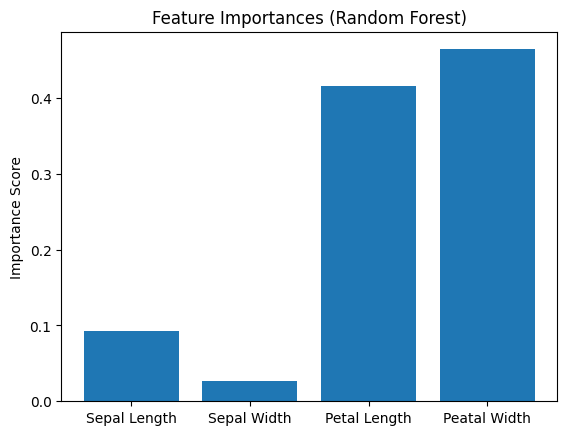

In [17]:
#Feature importance plot
feat_names = dataset.columns[:4]
importances =RF_classifier.feature_importances_
plt.bar(feat_names, importances)
plt.title("Feature Importances (Random Forest)")
plt.ylabel("Importance Score")
plt.show()
